### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

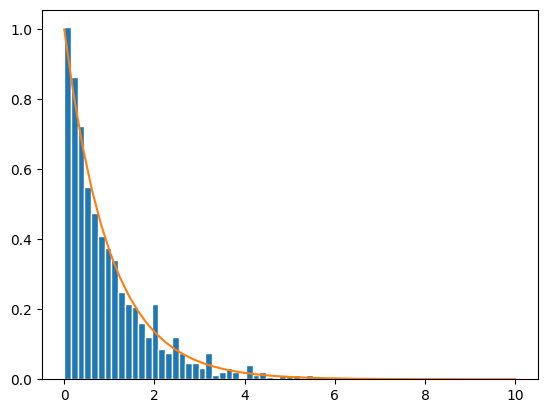

In [5]:
dist = sp.stats.gamma(1)
sample = dist.rvs(size=1000)
plt.hist(sample, bins=40, edgecolor="white", density=True)
x = np.linspace(0, 10)
plt.plot(x, dist.pdf(x))

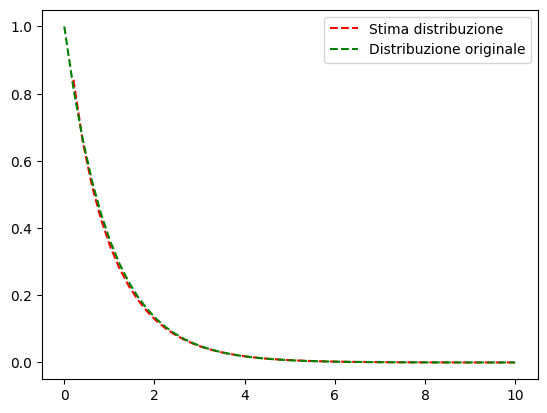

In [6]:
estimated_shape, loc, scale = sp.stats.gamma.fit(sample, floc=0)
plt.plot(x, sp.stats.gamma.pdf(x, a=estimated_shape, loc=loc, scale=scale), "r--", label='Stima distribuzione')
plt.plot(x, dist.pdf(x), 'g--', label='Distribuzione originale')
plt.legend()


1.0

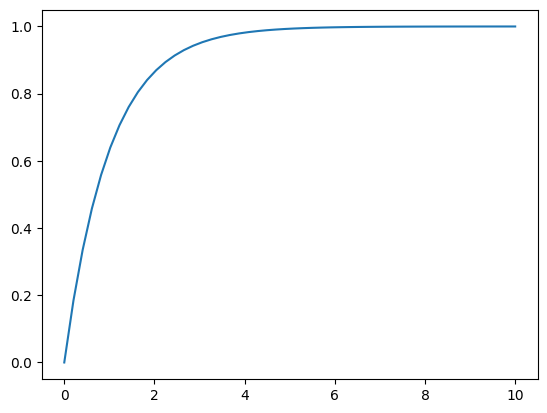

In [7]:
plt.plot(x, dist.cdf(x))
dist.var()

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

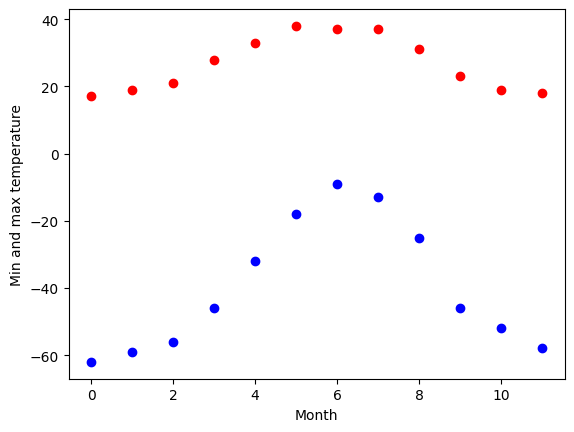

In [8]:
from math import sqrt
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

In [9]:
def rmse(y, pred):
    if len(y)!=len(pred):
        raise ValueError("Arrays are different length")
    return sqrt(sum([(y[i]-pred[i])**2 for i in range(len(y))])/len(y))

def mae(y, pred):
    if len(y)!=len(pred):
        raise ValueError("Arrays are different length")
    return sum([abs(y[i]-pred[i]) for i in range(len(y))])/len(y)

In [48]:
def plot_reg(x, y, degree, name):
    coeffs_poly = np.polyfit(x, y, degree) 
    poly = np.poly1d(coeffs_poly)

    domain = np.linspace(0, 11, 200)
    y_fit = poly(domain)
    y_fit_low_domain = poly(x)

    plt.plot(x, y, 'o', color='blue')
    plt.plot(domain, y_fit, '-', color='red')

    plt.grid(True)
    return f"{name}: [mae={mae(y, y_fit_low_domain):.3f} | rmse={rmse(y, y_fit_low_domain):.3f}]"

('temp_max: [mae=2.566 | rmse=2.895]', 'temp_min: [mae=6.359 | rmse=7.419]')

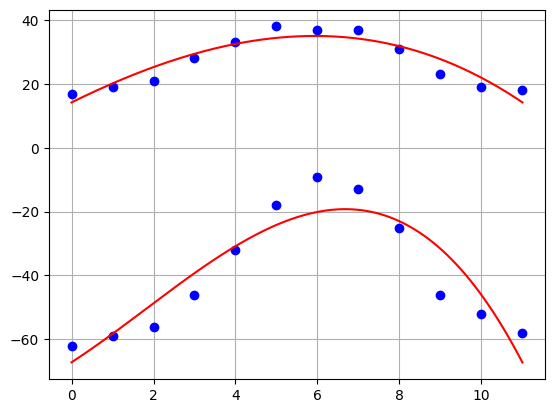

In [31]:
plot_reg(months, temp_max, 3, "temp_max"), plot_reg(months, temp_min, 3, "temp_min")

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [75]:
def linear(x, m, q):
    return m*x+q


In [75]:
def plot_reg2(x, y):
    popt, _ = sp.optimize.curve_fit(linear, x, y)
    domain = np.linspace(0, x.max(), 150)
    plt.plot(domain, linear(domain, f(x, *popt))


In [ ]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
# plt.plot(df.disp, "o")
plt.plot(df.disp, df.mpg, "o")
plt.xlabel("Displacement")
plt.ylabel("Miles per Gallon")
plot_reg2(df.disp, df.mpg)